In [1]:
# We can generate the data by using make_blobs()
# make_blobs() used to generate clusters and it uses 3 parameters:
# n_samples = is the total number of samples to generate.
# centers = is the number of centers to generate.
# cluster_std = is the standard deviation.

# make_blobs() returns a tuple of two values:
# A two-dimensional NumPy array with the x- and y-values for each of the samples
# A one-dimensional NumPy array containing the cluster labels for each sample


import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Generate data and labels by using make_blobs()
features, true_labels = make_blobs(
   n_samples=200,
   centers=3,
   cluster_std=2.75,
   random_state=65          # random_state=None
   )

In [3]:
features[:5]

array([[ -1.24732735,  -6.69061558],
       [ -3.89334246,  -8.40589556],
       [-10.00811029,  -9.13062805],
       [ -8.50776371, -12.33156366],
       [ -4.81792166,  -7.89674369]])

In [4]:
true_labels[:5]

array([1, 1, 0, 2, 1])

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:5]

array([[ 1.27791293,  0.39416195],
       [ 0.31057033, -0.16221118],
       [-1.92489517, -0.39728749],
       [-1.37639143, -1.43555213],
       [-0.02744167,  0.00293878]])

In [7]:
kmeans = KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=42)

In [8]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [9]:
kmeans.cluster_centers_

array([[-0.80155327,  0.21420602],
       [ 0.96656669,  0.72593409],
       [ 0.03886999, -1.1951186 ]])

In [10]:
kmeans.n_iter_

11

In [11]:
kmeans.labels_[:5]

array([1, 2, 0, 2, 0])

In [12]:
wsse =[]
kmeans_kwarg = {'init':'random', 'n_init':10, 'max_iter':300, 'random_state':42}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwarg)
    kmeans.fit(scaled_features)
    wsse.append(kmeans.inertia_)

In [13]:
wsse

[399.9999999999998,
 249.7576348117526,
 172.05158898202473,
 133.93563732890098,
 108.5992143232618,
 87.8212996197743,
 76.67810712008674,
 67.77585414967048,
 61.35403237819399,
 56.49447544894393]

([<matplotlib.axis.XTick at 0x1598880be90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

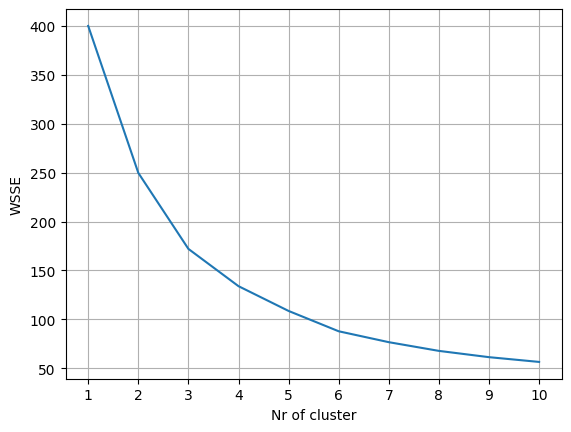

In [16]:
plt.plot(range(1,11), wsse)
plt.xlabel("Nr of cluster")
plt.ylabel("WSSE")
plt.grid(True)
plt.xticks(range(1,11))

In [17]:

from kneed import KneeLocator
k_elbow = KneeLocator(range(1,11), wsse, curve = 'convex', direction = 'decreasing')

In [18]:
k_elbow.elbow

3

In [20]:
kmeans_kwarg = {'init':'random', 'n_init':10, 'max_iter':300, 'random_state':42}
silhouette_coefficients=[]
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwarg)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients

[0.3627279399037829,
 0.3604950502858229,
 0.34476940571316644,
 0.36021267359935616,
 0.36283837201876673,
 0.36179175082251885,
 0.3593572345755416,
 0.34411190041233775,
 0.34796773049156826]

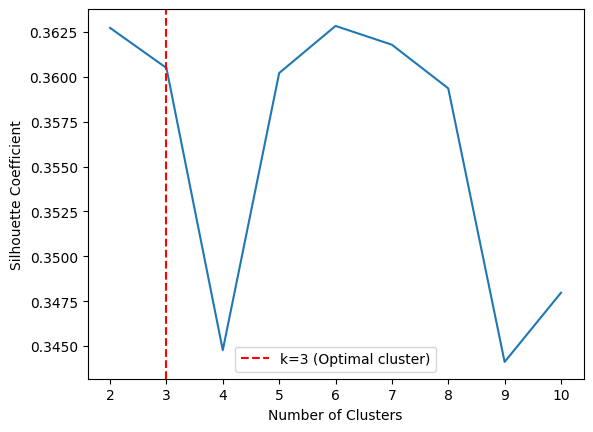

In [22]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.axvline(x=3, color='red', linestyle='--', label='k=3 (Optimal cluster)')
plt.legend()